In [2]:
from pypfopt import expected_returns, risk_models, EfficientFrontier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv("../data/portfolios.csv")

# Preview the data
df.head()


,client_id,asset_class,allocation_percent,value
0,1,Equities,22.72,41756.28
1,1,Fixed Income,24.72,45428.51
2,1,Real Estate,12.71,23355.61
3,1,Commodities,1.11,2037.62
4,1,Cash,38.74,71188.97


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pypfopt import EfficientFrontier, expected_returns, risk_models




# Set random seed for reproducibility
np.random.seed(42)

# Get unique clients
clients = df['client_id'].unique()

# Store results
all_client_weights = {}

# Simulate price data and optimize per client
for client in clients:
    client_df = df[df['client_id'] == client]
    
    assets = client_df['asset_class'].values
    values = client_df['value'].values
    
    # Simulate 100 days of prices
    dates = pd.date_range(end=pd.Timestamp.today(), periods=100)
    price_data = pd.DataFrame(index=dates)

    for asset in assets:
        price_data[asset] = 100 + np.cumsum(np.random.normal(0, 1, size=100))

    mu = expected_returns.mean_historical_return(price_data)
    S = risk_models.sample_cov(price_data)

    try:
        ef = EfficientFrontier(mu, S)
        weights = ef.max_sharpe(risk_free_rate=0.0)  # Lower risk-free rate
        cleaned = ef.clean_weights()
        all_client_weights[client] = cleaned

        print(f"\n🔹 Client {client} Portfolio Optimization:")
        print(cleaned)
        ef.portfolio_performance(verbose=True)
    
    except ValueError as e:
        print(f"\n⚠️ Skipping client {client} due to optimization error: {e}")




🔹 Client 1 Portfolio Optimization:
OrderedDict([('Equities', 0.0), ('Fixed Income', 0.16849), ('Real Estate', 0.20735), ('Commodities', 0.62416), ('Cash', 0.0)])
Expected annual return: 25.1%
Annual volatility: 9.2%
Sharpe Ratio: 2.74

🔹 Client 2 Portfolio Optimization:
OrderedDict([('Equities', 0.0), ('Fixed Income', 0.0), ('Real Estate', 0.0), ('Commodities', 0.77953), ('Cash', 0.22047)])
Expected annual return: 52.0%
Annual volatility: 10.7%
Sharpe Ratio: 4.86

🔹 Client 3 Portfolio Optimization:
OrderedDict([('Equities', 0.34619), ('Fixed Income', 0.14344), ('Real Estate', 0.00284), ('Commodities', 0.0), ('Cash', 0.50754)])
Expected annual return: 61.9%
Annual volatility: 8.2%
Sharpe Ratio: 7.51

🔹 Client 4 Portfolio Optimization:
OrderedDict([('Equities', 0.0), ('Fixed Income', 0.63929), ('Real Estate', 0.15958), ('Commodities', 0.0), ('Cash', 0.20113)])
Expected annual return: 37.6%
Annual volatility: 10.0%
Sharpe Ratio: 3.76

🔹 Client 5 Portfolio Optimization:
OrderedDict([('Equ

In [5]:
import pandas as pd

# Example DataFrame creation (replace with your real data)
data = {
    'client_id': [1, 1, 1, 1, 1],
    'asset_class': ['Equities', 'Fixed Income', 'Real Estate', 'Commodities', 'Cash'],
    'allocation_percent': [22.72, 24.72, 12.71, 1.11, 38.74],
    'value': [41756.28, 45428.51, 23355.61, 2037.62, 71188.97]
}
df = pd.DataFrame(data)

# Calculate total portfolio value per client
total_value = df.groupby('client_id')['value'].sum().reset_index(name='total_portfolio_value')

print(total_value)


   client_id  total_portfolio_value
0          1              183766.99


In [6]:
import pandas as pd
import numpy as np

# 🔹 Step 1: Your data (replace this with full dataset)
data = {
    'client_id': [1, 1, 1, 1, 1,
                  2, 2, 2, 2, 2],
    'asset_class': ['Equities', 'Fixed Income', 'Real Estate', 'Commodities', 'Cash']*2,
    'allocation_percent': [22.72, 24.72, 12.71, 1.11, 38.74,
                           0.0, 0.0, 0.0, 77.95, 22.05],
    'value': [41756.28, 45428.51, 23355.61, 2037.62, 71188.97,
              0.0, 0.0, 0.0, 77953.0, 22047.0]
}

df = pd.DataFrame(data)

# 🔹 Step 2: Calculate total portfolio value per client
portfolio_summary = df.groupby('client_id')['value'].sum().reset_index(name='total_portfolio_value')

# 🔹 Step 3: Estimate net worth (assume portfolio = 60% of net worth)
portfolio_summary['estimated_net_worth'] = (portfolio_summary['total_portfolio_value'] / 0.6).round(2)

# 🔹 Step 4: Estimate income using a random multiplier between 1.5 and 4.0
np.random.seed(42)  # for reproducibility
multipliers = np.random.uniform(1.5, 4.0, size=len(portfolio_summary))
portfolio_summary['income_estimate'] = (portfolio_summary['estimated_net_worth'] / multipliers).round(2)

# 🔹 Optional: Add multiplier column if needed
portfolio_summary['multiplier_used'] = multipliers.round(2)

# 🔹 Final output
print(portfolio_summary)


   client_id  total_portfolio_value  estimated_net_worth  income_estimate  \
0          1              183766.99            306278.32        125711.94   
1          2              100000.00            166666.67         42990.94   

   multiplier_used  
0             2.44  
1             3.88  


In [6]:
mu = expected_returns.mean_historical_return(price_data)
S = risk_models.sample_cov(price_data)

mu, S


(Equities        0.051248
 Fixed Income    0.119287
 Real Estate    -0.263228
 Commodities    -0.064829
 Cash           -0.007138
 dtype: float64,
               Equities  Fixed Income  Real Estate  Commodities      Cash
 Equities      0.025316      0.004332     0.000198     0.001883 -0.000081
 Fixed Income  0.004332      0.024904    -0.000327    -0.003087  0.001267
 Real Estate   0.000198     -0.000327     0.023779     0.001078  0.002132
 Commodities   0.001883     -0.003087     0.001078     0.021455  0.004498
 Cash         -0.000081      0.001267     0.002132     0.004498  0.023360)

In [7]:
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()

print("Optimized Weights:")
print(cleaned_weights)

ef.portfolio_performance(verbose=True)


Optimized Weights:
OrderedDict([('Equities', 0.2135), ('Fixed Income', 0.7865), ('Real Estate', 0.0), ('Commodities', 0.0), ('Cash', 0.0)])
Expected annual return: 10.5%
Annual volatility: 13.4%
Sharpe Ratio: 0.78


(0.10476033503948802, 0.13421536930280892, 0.7805390365028452)

In [9]:
from pypfopt import EfficientFrontier

# Initialize optimizer
ef = EfficientFrontier(mu, S)

# Maximize Sharpe Ratio portfolio weights
weights = ef.max_sharpe()

# Clean weights to get readable output
cleaned_weights = ef.clean_weights()

print("Optimized Weights:")
print(cleaned_weights)

# Print portfolio performance (returns, volatility, Sharpe ratio)
ef.portfolio_performance(verbose=True)


Optimized Weights:
OrderedDict([('Equities', 0.2135), ('Fixed Income', 0.7865), ('Real Estate', 0.0), ('Commodities', 0.0), ('Cash', 0.0)])
Expected annual return: 10.5%
Annual volatility: 13.4%
Sharpe Ratio: 0.78


(0.10476033503948802, 0.13421536930280892, 0.7805390365028452)

In [ ]:
#Run Mean-Variance Optimization (Maximize Sharpe Ratio)

In [10]:
from pypfopt import EfficientFrontier

# Initialize optimizer
ef = EfficientFrontier(mu, S)

# Maximize Sharpe Ratio portfolio weights
weights = ef.max_sharpe()

# Clean weights to get readable output
cleaned_weights = ef.clean_weights()

print("Optimized Weights:")
print(cleaned_weights)

# Print portfolio performance (returns, volatility, Sharpe ratio)
ef.portfolio_performance(verbose=True)


Optimized Weights:
OrderedDict([('Equities', 0.2135), ('Fixed Income', 0.7865), ('Real Estate', 0.0), ('Commodities', 0.0), ('Cash', 0.0)])
Expected annual return: 10.5%
Annual volatility: 13.4%
Sharpe Ratio: 0.78


(0.10476033503948802, 0.13421536930280892, 0.7805390365028452)

In [ ]:
#Plot Efficient Frontier

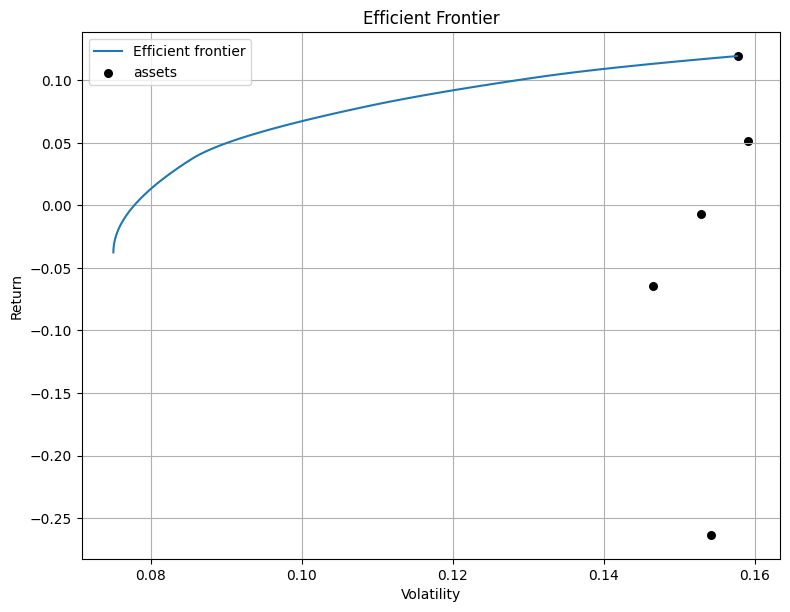

In [12]:
from pypfopt import EfficientFrontier, plotting
import matplotlib.pyplot as plt

# Re-create the EfficientFrontier object fresh for plotting
ef_for_plot = EfficientFrontier(mu, S)

fig, ax = plt.subplots(figsize=(8, 6))

# Use the fresh instance to plot
plotting.plot_efficient_frontier(ef_for_plot, ax=ax, show_assets=True)

plt.title("Efficient Frontier")
plt.grid(True)
plt.show()


In [9]:
import pandas as pd

# Load portfolsio.csv
df = pd.read_csv("../data/portfolios.csv")

# Group by client_id and compute total portfolio value
summary = df.groupby('client_id').agg(total_value=('value', 'sum')).reset_index()

# Merge back to calculate allocation percentage if missing
df = df.merge(summary, on='client_id')
df['calculated_percent'] = (df['value'] / df['total_value']) * 100

# Aggregate allocations per asset class
pivot = df.pivot_table(index='client_id', 
                       columns='asset_class', 
                       values='calculated_percent', 
                       aggfunc='sum', 
                       fill_value=0).reset_index()

# Merge total value
portfolio_summary = pd.merge(pivot, summary, on='client_id')

# Estimate net worth (e.g., assume portfolio = 70% of net worth)
portfolio_summary['estimated_net_worth'] = (portfolio_summary['total_value'] / 0.7).round(2)

# Estimate income (e.g., assume net worth = 3.5 × income)
portfolio_summary['estimated_income'] = (portfolio_summary['estimated_net_worth'] / 3.5).round(2)

# Reorder columns
cols = ['client_id', 'total_value', 'estimated_net_worth', 'estimated_income'] + \
       [col for col in portfolio_summary.columns if col not in ['client_id', 'total_value', 'estimated_net_worth', 'estimated_income']]
portfolio_summary = portfolio_summary[cols]

# Export to CSV
portfolio_summary.to_csv('portfolio_summary_with_income.csv', index=False)
print("✅ Portfolio summary with estimated income exported to 'portfolio_summary_with_income.csv'")


✅ Portfolio summary with estimated income exported to 'portfolio_summary_with_income.csv'


In [11]:
print(portfolio_summary)

    client_id  total_value  estimated_net_worth  estimated_income       Cash  \
0           1    183766.99            262524.27          75006.93  38.738715   
1           2    350804.00            501148.57         143185.31  25.865495   
2           3    364400.00            520571.43         148734.69   6.924273   
3           4     74538.00            106482.86          30423.67  32.175441   
4           5    148806.00            212580.00          60737.14  15.908062   
5           6    493852.00            705502.86         201572.25   0.740315   
6           7    261428.00            373468.57         106705.31  23.094340   
7           8    387593.99            553705.70         158201.63   3.124581   
8           9    407403.00            582004.29         166286.94   2.346065   
9          10    465192.00            664560.00         189874.29   3.768214   
10         11    105016.00            150022.86          42863.67  56.438819   
11         12     63545.00             9